In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random


In [2]:
from mnist import MNIST

mndata = MNIST(r"C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!Semesters\2nd Sem\Courses\CS 559 NN\Homeworks\HW2\Q2\data\t")

xtrain, ytrain = mndata.load_training()
xtest, ytest = mndata.load_testing()
xtrain = np.reshape(xtrain,(60000,784,1))
xtest = np.reshape(xtest,(10000,784,1))
xtrain = (xtrain)/255
xtest = (xtest)/255
xtrain.shape




(60000, 784, 1)

In [3]:
w = random.normal(size = (10,784))

d = np.zeros(shape = (len(xtrain),10))
for i in range(len(ytrain)):
    d[i][ytrain[i]] = 1

dt = np.zeros(shape = (len(xtest),10))
for i in range(len(ytest)):
    dt[i][ytest[i]] = 1

In [4]:
d = d.reshape(60000, 10,1)
dt = dt.reshape(10000, 10,1)
d[0].shape

(10, 1)

In [5]:
def af(x):
    max = np.argmax(x)
    y = []
    for i in range(10) :
        if(i == max):
            y.append(1)
        else :
            y.append(0)
    return y

In [6]:
def error(x, d, w, n):
    count = 0
    for i in range(n):
        p = np.matmul(w, x[i])
        y = np.array(af(p)).reshape(10,1)
        if np.any(d[i] - y):
            count += 1
    return count


In [7]:

  
def func(x,d,w, lr, e, n):
    epoch = 0
    errors = []
    errors.append(error(x, d, w, n))
    while errors[epoch]/n > e:
        count = 0
        for i in range(n):
            p = np.matmul(w, x[i])
            y = np.array(af(p)).reshape(10,1)
            if np.any(d[i] - y):
                count += 1
            w = w +  np.matmul(np.subtract(d[i],y),np.transpose(x[i])) * lr          
        errors.append(count)
        epoch += 1
    return w, errors

Text(0.5, 0, 'Epoch')

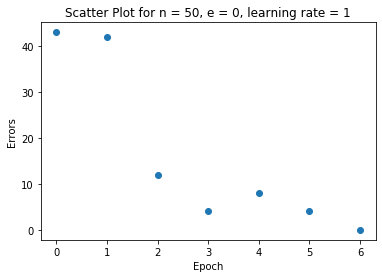

In [8]:
# 2) f) 
wopt, errors = func(xtrain, d, w, 1, 0, 50)
epo =[]
for i in range(len(errors)):
    epo.append(i)
plt.scatter(epo,errors)
#print(np.array_equal(wopt,w))
plt.title("Scatter Plot for n = 50, e = 0, learning rate = 1")
plt.ylabel("Errors")
plt.xlabel("Epoch")

In [9]:
count = error(xtest, dt, wopt, 10000)
print(count)
print("Percentage of testing error for training with n = 50, e = 0, learning rate = 1 is " + str((count/10000)*100))

4306
Percentage of testing error for training with n = 50, e = 0, learning rate = 1 is 43.059999999999995


Text(0.5, 0, 'Epoch')

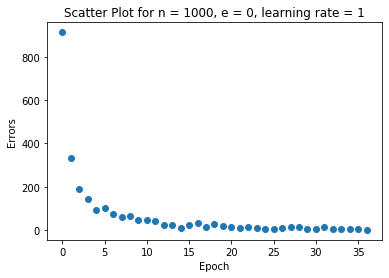

In [10]:
# 2) g)
wopt, errors = func(xtrain, d, w, 1, 0, 1000)
epo =[]
for i in range(len(errors)):
    epo.append(i)
plt.scatter(epo,errors)
plt.title("Scatter Plot for n = 1000, e = 0, learning rate = 1")
plt.ylabel("Errors")
plt.xlabel("Epoch")

In [11]:
count = error(xtest, dt, wopt, 10000)
print(count)
print("Percentage of testing error for training with n = 1000, e = 0, learning rate = 1 is " + str((count/10000)*100))

1722
Percentage of testing error for training with n = 1000, e = 0, learning rate = 1 is 17.22


In [12]:
# 2) h)
  
def func60000(x,d,w, lr, n):
    epoch = 0
    errors = []
    errors.append(error(x, d, w, n))
    while epoch < 31:
        count = 0
        for i in range(n):
            p = np.matmul(w, x[i])
            y = np.array(af(p)).reshape(10,1)
            if np.any(d[i] - y):
                count += 1
            w = w +  np.matmul(np.subtract(d[i],y),np.transpose(x[i])) * lr          
        
        errors.append(count)
        epoch += 1
    print(count)
    return w, errors

6409


Text(0.5, 0, 'Epoch')

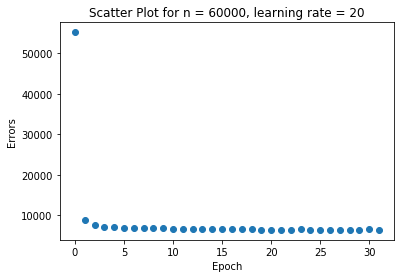

In [13]:
wopt, errors = func60000(xtrain, d, w, 20, 60000)
epo =[]
for i in range(len(errors)):
    epo.append(i)
plt.scatter(epo,errors)
plt.title("Scatter Plot for n = 60000, learning rate = 20")
plt.ylabel("Errors")
plt.xlabel("Epoch")

In [14]:
count = error(xtest, dt, wopt, 10000)
print(count)
print("Percentage of testing error for training with n = 60000, learning rate = 20 is " + str((count/10000)*100))

1178
Percentage of testing error for training with n = 60000, learning rate = 20 is 11.78


Text(0.5, 0, 'Epoch')

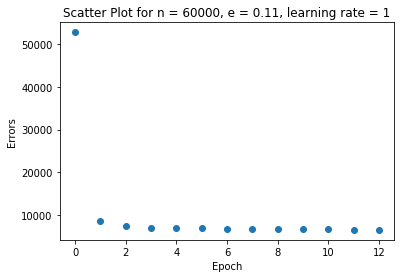

In [21]:
# 2) i)
w = random.normal(size = (10,784))

wopt, errors = func(xtrain, d, w, 1, 0.11, 60000)
epo =[]
for i in range(len(errors)):
    epo.append(i)
plt.scatter(epo,errors)
plt.title("Scatter Plot for n = 60000, e = 0.11, learning rate = 1")
plt.ylabel("Errors")
plt.xlabel("Epoch")

In [22]:
count = error(xtest, dt, wopt, 10000)
print(count)
print("Percentage of testing error for training with n = 60000, e = 0.11, learning rate = 1 is " + str((count/10000)*100))

1313
Percentage of testing error for training with n = 60000, e = 0.11, learning rate = 1 is 13.13


Text(0.5, 0, 'Epoch')

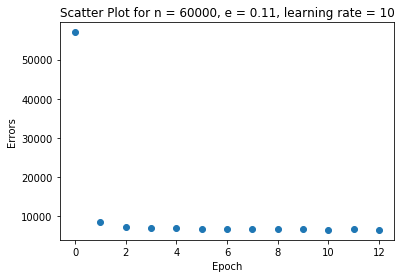

In [23]:
w = random.normal(size = (10,784))

wopt, errors = func(xtrain, d, w, 10, 0.11, 60000)
epo =[]
for i in range(len(errors)):
    epo.append(i)
plt.scatter(epo,errors)
plt.title("Scatter Plot for n = 60000, e = 0.11, learning rate = 10")
plt.ylabel("Errors")
plt.xlabel("Epoch")

In [24]:
count = error(xtest, dt, wopt, 10000)
print(count)
print("Percentage of testing error for training with n = 60000, e = 0.11, learning rate = 10 is " + str((count/10000)*100))

1385
Percentage of testing error for training with n = 60000, e = 0.11, learning rate = 10 is 13.850000000000001


Text(0.5, 0, 'Epoch')

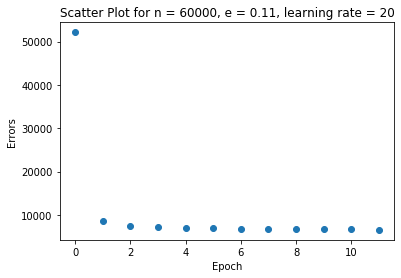

In [25]:
w = random.normal(size = (10,784))

wopt, errors = func(xtrain, d, w, 20, 0.11, 60000)
epo =[]
for i in range(len(errors)):
    epo.append(i)
plt.scatter(epo,errors)
plt.title("Scatter Plot for n = 60000, e = 0.11, learning rate = 20")
plt.ylabel("Errors")
plt.xlabel("Epoch")

In [26]:
count = error(xtest, dt, wopt, 10000)
print(count)
print("Percentage of testing error for training with n = 60000, e = 0.11, learning rate = 20 is " + str((count/10000)*100))

1320
Percentage of testing error for training with n = 60000, e = 0.11, learning rate = 20 is 13.200000000000001
